# Code for wrangling and plotting VOC proportions data downloaded from PHAC

## Notebook created on: October 21, 2021

## Notebook last updated on: October 21, 2021

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in data

In [5]:
df = pd.read_csv('data/covid19-epiSummary-variants-detailed-download.csv')
df.head()

,Variant Grouping,_Identifier,Lineage Grouped,%CT Count of Sample #,Collection (week)
0,VOC,Alpha,B.1.1.7,0.001,2020-04-05
1,VOC,Alpha,B.1.1.7,0.001,2020-04-19
2,VOC,Alpha,B.1.1.7,0.004,2020-05-10
3,VOC,Alpha,B.1.1.7,0.006,2020-05-17
4,VOC,Alpha,B.1.1.7,0.001,2020-11-08


In [6]:
df.columns = ['grouping', 'identifier', 'lineage', 'percentage', 'week']
df['week'] = pd.to_datetime(df['week'])
df.head()

,grouping,identifier,lineage,percentage,week
0,VOC,Alpha,B.1.1.7,0.001,2020-04-05
1,VOC,Alpha,B.1.1.7,0.001,2020-04-19
2,VOC,Alpha,B.1.1.7,0.004,2020-05-10
3,VOC,Alpha,B.1.1.7,0.006,2020-05-17
4,VOC,Alpha,B.1.1.7,0.001,2020-11-08


In [39]:
unique_weeks = df.week.unique()
unique_identifiers = df.identifier.unique()
unique_weeks_columns = ['grouping', 'identifier', 'percentage', 'week']
df_unique_weeks = pd.DataFrame(columns = unique_weeks_columns)

In [40]:
for identifier in unique_identifiers:
    df_sub1 = df[df['identifier'] == identifier]
    #print(df_sub1.head())
    for week in unique_weeks:
        df_sub2 = df_sub1[df_sub1['week'] == week]
        #print(df_sub2.head())
        pct = df_sub2.percentage.sum()
        df_unique_weeks.loc[len(df_unique_weeks)] = [df_sub1.iloc[0]['grouping'], identifier, pct, week]

df_unique_weeks.head()


,grouping,identifier,percentage,week
0,VOC,Alpha,0.001,2020-04-05
1,VOC,Alpha,0.001,2020-04-19
2,VOC,Alpha,0.004,2020-05-10
3,VOC,Alpha,0.006,2020-05-17
4,VOC,Alpha,0.001,2020-11-08


In [43]:
print(df_unique_weeks.grouping.unique())
print(df_unique_weeks.identifier.unique())

['VOC' 'VOI' 'Other']
['Alpha' 'Beta' 'Delta' 'Gamma' 'A.23.1' 'B.1.1.318' 'B.1.617.3' 'Epsilon'
 'Eta' 'Iota' 'Kappa' 'Lambda' 'Mu' 'Theta' 'Zeta' 'B.1.438' 'Other']


In [ ]:
df_unique_weeks.to_csv('VOC_proportions.csv', encoding='utf-8', index=False)

(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

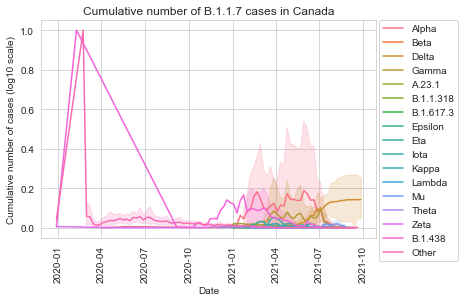

In [44]:
sns.set_style("whitegrid")
sns.lineplot(x = "week", y = "percentage", hue = "identifier", data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of B.1.1.7 cases in Canada")
plt.ylabel("Cumulative number of cases (log10 scale)")
plt.xlabel("Date")
plt.xticks(rotation=90)


No handles with labels found to put in legend.


(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

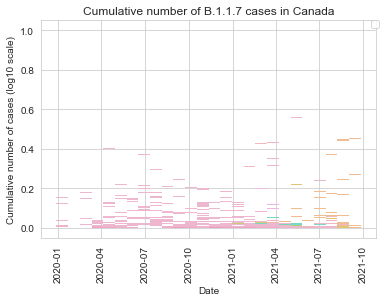

In [46]:
sns.set_style("whitegrid")
sns.histplot(x = "week", y = "percentage", hue = "identifier", multiple = "stack", data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Cumulative number of B.1.1.7 cases in Canada")
plt.ylabel("Cumulative number of cases (log10 scale)")
plt.xlabel("Date")
plt.xticks(rotation=90)